<a href="https://colab.research.google.com/github/sksaket/Assignment-on-Text-Mining/blob/main/emotion_mining_Extract_reviews_of_any_product_from_ecommerce_website_like_amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [72]:
#Read the file
import pandas
data=pd.read_csv("/content/amazon_com-product_reviews__20200101_20200331_sample.csv",encoding="latin-1",error_bad_lines=False)

In [73]:
data

,Uniq Id,Crawl Timestamp,Billing Uniq Id,Rating,Review Title,Review Rating,Review Date,User Id,Brand,Category,Sub Category,Product Description,Asin,Url,text,Verified Purchase,Helpful Review Count,Manufacturer Response
0,10d8b81dc693db8a3f92e19254525d53,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,Best Natural Deodorant!!,5,"March 6, 2020",AGIZFDSHLSBZ7KHQ4FV65W7B3HMQ,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidtâs natural deodorant formulas use inn...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R2Q...,This is the one natural deodorant that works f...,Verified Purchase,0,NaN
1,31ef1ee4961d3fcff33e363edd7677eb,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,Schmidt's Charcoal Deodorant is the best!,5,"March 6, 2020",AHOZPYWO6WE5MLAZZPDUAWNKKNRQ,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidtâs natural deodorant formulas use inn...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R14...,I am staying away from the conventional deodor...,Verified Purchase,0,NaN
2,6943e517922b051cbec496be32fbb57f,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,Beware. Defective or counterfeit.,1,"March 6, 2020",AECC6GYWWLNCKSBG3DZDGFSYDOTA,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidtâs natural deodorant formulas use inn...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R2R...,Do not buy this from Amazon it's either defect...,Verified Purchase,One person found this helpful Helpful,NaN
3,6778c794e6ac7112981d4ebb239d6826,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,Good for infrequent shavers in cooler months i...,3,"March 5, 2020",AEOO6OOEO4QD7Z4F6C2FMZUCW7PA,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidtâs natural deodorant formulas use inn...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/RMI...,I started using this because I was getting cys...,NO,0,NaN
4,2335a28ae24db3b2191080bfd98a86e0,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,This isnât the true product and will hurt yo...,1,"March 2, 2020",AEHSDCGRIMVOUG6ST35FJ4FMMW5Q,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidtâs natural deodorant formulas use inn...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R1R...,Dont buy this from amazon!!!! I never write re...,Verified Purchase,One person found this helpful Helpful,NaN
5,33bdd85b5bfc5a9ed528b2182d393e1a,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,A good choice for deodorant,5,"March 1, 2020",AEBMSOME6YNIFY4XQ7D2YLVWVO2Q,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidtâs natural deodorant formulas use inn...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R1Q...,Great natural deodorant! It works!,Verified Purchase,0,NaN
6,afdd2760b29787829eca03c79baa794a,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,Nice Smell,5,"February 26, 2020",AGXV56HW7TKTKEGVIMMUQMBCAFWQ,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidtâs natural deodorant formulas use inn...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R27...,Great for those who are sensitive to perfumed ...,Verified Purchase,0,NaN
7,f1d50311e1659471c4bf46ba1ceb5aa6,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,Works OK but stains clothes,2,"February 26, 2020",AEHB3GIOUHLLXJTETQOHBGBGCX6Q,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidtâs natural deodorant formulas use inn...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R2D...,Well I stopped using it today. Gave it about 3...,Verified Purchase,0,NaN
8,3083f245a5bcee9c346b946ba7911ef5,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,My skin hated it,3,"February 24, 2020",AHDNFS55ZAXA3URINNMOCPR35GFA,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidtâs natural deodorant formulas use inn...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R1H...,I was excited to try this deodoran

In [74]:
data1=data["text"]

In [75]:
data1

0     This is the one natural deodorant that works f...
1     I am staying away from the conventional deodor...
2     Do not buy this from Amazon it's either defect...
3     I started using this because I was getting cys...
4     Dont buy this from amazon!!!! I never write re...
5                    Great natural deodorant! It works!
6     Great for those who are sensitive to perfumed ...
7     Well I stopped using it today. Gave it about 3...
8     I was excited to try this deodorant. I have be...
9     The only deodorant Iâll ever use anymore, no...
10                Excellent mustard, I highly recommend
11                                        Tastes great!
12    Fantastic delicious I used it in everything si...
13    First, this is a bit pricier than the usual st...
14    I have been using this product for several mon...
15    I get rashes from almost all deodorants but di...
16    Since it is not an anti-perspirant my armpits ...
17    Very very Strong scent!!!!!i threw it away

In [76]:
data1=pd.DataFrame(data1)

In [77]:
data1

,text
0,This is the one natural deodorant that works f...
1,I am staying away from the conventional deodor...
2,Do not buy this from Amazon it's either defect...
3,I started using this because I was getting cys...
4,Dont buy this from amazon!!!! I never write re...
5,Great natural deodorant! It works!
6,Great for those who are sensitive to perfumed ...
7,Well I stopped using it today. Gave it about 3...
8,I was excited to try this deodorant. I have be...
9,"The only deodorant Iâll ever use anymore, no..."


In [78]:
#Sentiment analysis
afinn = pd.read_csv('/content/Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [79]:
data1 = [text.strip() for text in data1.text]#removing blank spaces

In [80]:
data1 = [text for text in data1 if text]#removing black lines

In [81]:
data1

['This is the one natural deodorant that works for me, no b.o smell throughout the day! Score. Although it will never absorb quite like those cancer causing deodorants, this is definitely a must buy!!',
 "I am staying away from the conventional deodorants that have lots of fragrance combined with aluminum which is an irritant to my skin and bad for the body anyway. In my search for a product that smelled fresh enough for a woman to use and one that worked, I came upon Schmidt's charcoal. I was pleasantly surprised! It is smooth and easy to put on, it doesn't get gloppy like some, it keeps me feeling fresh all day long and it works! The price is so worth it because it lasts A LONG TIME. Try it! You'll be happy you did.",
 "Do not buy this from Amazon it's either defective or counterfeit. I used to buy the same product at Costco, it works great. As the picture shows there are clumps throughout the stick and it causes the product to overapply and get messy. The sticks from Costco were smo

In [82]:
#tokenizing
import nltk
nltk.download('punkt')
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data1))
sentences[0:15]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['This is the one natural deodorant that works for me, no b.o smell throughout the day!',
 'Score.',
 'Although it will never absorb quite like those cancer causing deodorants, this is definitely a must buy!!',
 'I am staying away from the conventional deodorants that have lots of fragrance combined with aluminum which is an irritant to my skin and bad for the body anyway.',
 "In my search for a product that smelled fresh enough for a woman to use and one that worked, I came upon Schmidt's charcoal.",
 'I was pleasantly surprised!',
 "It is smooth and easy to put on, it doesn't get gloppy like some, it keeps me feeling fresh all day long and it works!",
 'The price is so worth it because it lasts A LONG TIME.',
 'Try it!',
 "You'll be happy you did.",
 "Do not buy this from Amazon it's either defective or counterfeit.",
 'I used to buy the same product at Costco, it works great.',
 'As the picture shows there are clumps throughout the stick and it causes the product to overapply and ge

In [83]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,This is the one natural deodorant that works f...
1,Score.
2,Although it will never absorb quite like those...
3,I am staying away from the conventional deodor...
4,In my search for a product that smelled fresh ...
...,...
139,"The smell is amazing and lingers lightly, whic..."
140,Will buy more!
141,I absolutely love this body oil!
142,The combined oils and scents used are perfect.


In [84]:
#frequency of words
freq1 = pd.Series(' '.join(sent_df['sentence']).split()).value_counts()[:50] # for top 20
freq1

I            70
the          54
and          48
it           44
a            33
this         32
to           29
for          28
is           25
of           19
my           19
not          17
have         14
It           14
so           13
like         12
was          12
The          12
in           11
that         11
from          9
good          9
smell         9
using         9
as            8
one           8
skin          8
product       8
deodorant     7
use           7
scent         7
but           7
aluminum      7
after         7
been          6
are           6
get           6
or            6
buy           6
because       6
about         6
love          6
tried         6
be            6
&             5
do            5
it.           5
with          5
This          5
no            5
dtype: int64

In [85]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [86]:
my_stopwords = stopwords.words('english')
my_stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [87]:
#removing stopwords
sent_df['sentence1'] = sent_df['sentence'].apply(lambda x: ' '.join([x for x in x.split() if x not in (my_stopwords)]))

In [88]:
#removing punctuations
sent_df['clean'] = sent_df['sentence1'].apply(lambda x: ' '.join([x for x in x.split() if x not in string.punctuation]))

In [89]:
sent_df

,sentence,sentence1,clean
0,This is the one natural deodorant that works f...,"This one natural deodorant works me, b.o smell...","This one natural deodorant works me, b.o smell..."
1,Score.,Score.,Score.
2,Although it will never absorb quite like those...,Although never absorb quite like cancer causin...,Although never absorb quite like cancer causin...
3,I am staying away from the conventional deodor...,I staying away conventional deodorants lots fr...,I staying away conventional deodorants lots fr...
4,In my search for a product that smelled fresh ...,In search product smelled fresh enough woman u...,In search product smelled fresh enough woman u...
...,...,...,...
139,"The smell is amazing and lingers lightly, whic...","The smell amazing lingers lightly, I love.","The smell amazing lingers lightly, I love."
140,Will buy more!,Will buy more!,Will buy more!
141,I absolutely love this body oil!,I absolutely love body oil!,I absolutely love body oil!
142,The combined oils and scents used are perfect.,The combined oils scents used perfect.,The combined oils scents used perfect.


In [90]:
sent_df=sent_df.drop('sentence',axis=1)

In [91]:
sent_df=sent_df.drop('sentence1',axis=1)

In [92]:
sent_df

,clean
0,"This one natural deodorant works me, b.o smell..."
1,Score.
2,Although never absorb quite like cancer causin...
3,I staying away conventional deodorants lots fr...
4,In search product smelled fresh enough woman u...
...,...
139,"The smell amazing lingers lightly, I love."
140,Will buy more!
141,I absolutely love body oil!
142,The combined oils scents used perfect.


In [93]:
from itertools import islice
def take(n,iterable):
    "Return first n items of the iterable as list"
    return list(islice(iterable,n))

In [94]:
#coverting to dic format and for 20 words
affinity_scores = afinn.set_index('word')['value'].to_dict()
take(20,affinity_scores.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [95]:
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        clean = nlp(text)
        for word in clean:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [96]:
#calulating the sentiment value for each sentence
sent_df['sentiment_value'] = sent_df['clean'].apply(calculate_sentiment)

In [97]:
sent_df['sentiment_value']

0      1
1      0
2      1
3     -3
4      1
      ..
139    7
140    0
141    3
142    3
143    5
Name: sentiment_value, Length: 144, dtype: int64

In [98]:
#calulating the number of words in each sentence
sent_df['word_count'] = sent_df['clean'].str.split().apply(len)
sent_df['word_count'].head(10)

0    10
1     1
2    11
3    14
4    15
5     3
6    15
7     7
8     2
9     3
Name: word_count, dtype: int64

In [99]:
#sort based on sentiment value
sent_df.sort_values(by='sentiment_value').head(10)

,clean,sentiment_value,word_count
40,"Gave 3 weeks honestly bad smelling, react terr...",-6,15
90,I stop using two days smell bad.,-4,7
43,I'm gonna wear something destroys clothes.,-3,6
3,I staying away conventional deodorants lots fr...,-3,14
64,I worry aluminum passing thru pores!,-3,6
100,The thing I dislike seeds.,-2,5
51,"My skin felt burned scraped, every time arm mo...",-2,14
117,I DISLIKED (5) (8) flavors I tried I dislike A...,-2,12
54,It took days burning ache go away.,-2,7
19,After going dermatologist I thought I serious ...,-2,12


In [100]:
sent_df['sentiment_value'].describe() #Here the max sentiment value is 13 and min value is -4

count    144.000000
mean       1.465278
std        2.604228
min       -6.000000
25%        0.000000
50%        0.500000
75%        3.000000
max       15.000000
Name: sentiment_value, dtype: float64

In [101]:
#sentiment value less than or equal to 0
sent_df[sent_df['sentiment_value']<=0]

,clean,sentiment_value,word_count
1,Score.,0,1
3,I staying away conventional deodorants lots fr...,-3,14
5,I pleasantly surprised!,0,3
8,Try it!,0,2
10,Do buy Amazon either defective counterfeit.,0,6
...,...,...,...
128,The caramel truffles!,0,3
134,"I use shower, I towel off.",0,6
135,It leaves skin silky scent delicate.,-1,6
137,I really dry skin would run oils re-apply six ...,0,11


In [102]:
#sentiment value greater than 0
sent_df[sent_df['sentiment_value']>0]

,clean,sentiment_value,word_count
0,"This one natural deodorant works me, b.o smell...",1,10
2,Although never absorb quite like cancer causin...,1,11
4,In search product smelled fresh enough woman u...,1,15
6,"It smooth easy put on, get gloppy like some, k...",4,15
7,The price worth lasts A LONG TIME.,2,7
...,...,...,...
138,With brand I use morning shower right bed warm...,1,10
139,"The smell amazing lingers lightly, I love.",7,7
141,I absolutely love body oil!,3,5
142,The combined oils scents used perfect.,3,6


In [103]:
sent_df['index']=range(0,len(sent_df))

In [104]:
sent_df

,clean,sentiment_value,word_count,index
0,"This one natural deodorant works me, b.o smell...",1,10,0
1,Score.,0,1,1
2,Although never absorb quite like cancer causin...,1,11,2
3,I staying away conventional deodorants lots fr...,-3,14,3
4,In search product smelled fresh enough woman u...,1,15,4
...,...,...,...,...
139,"The smell amazing lingers lightly, I love.",7,7,139
140,Will buy more!,0,3,140
141,I absolutely love body oil!,3,5,141
142,The combined oils scents used perfect.,3,6,142


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


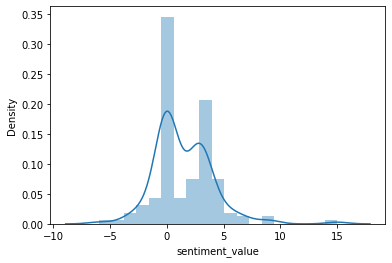

In [105]:
#densityplot
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

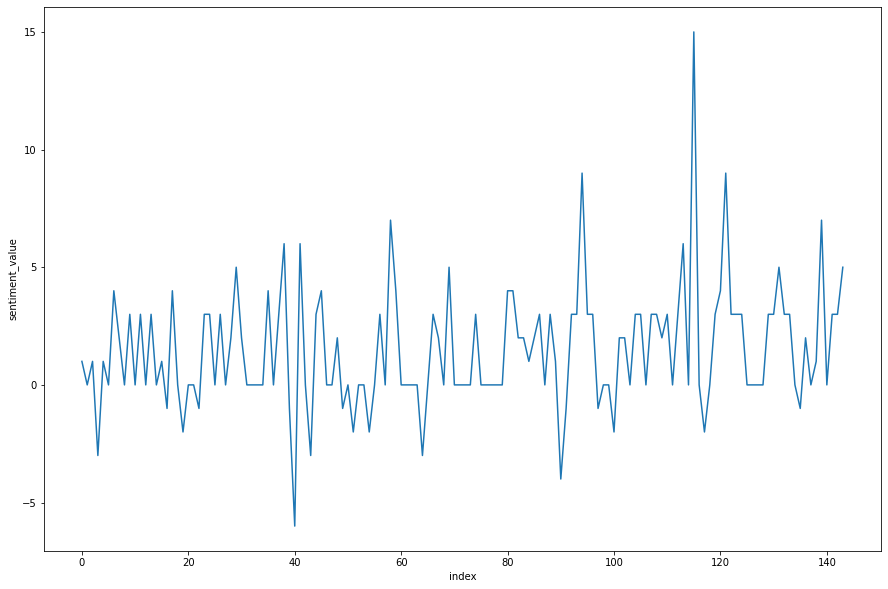

In [106]:
#lineplot based on sentiment value
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

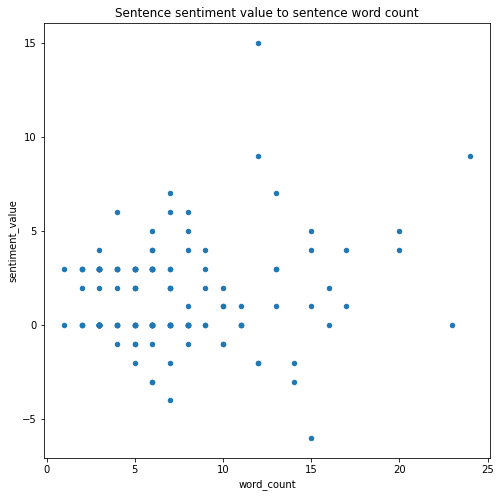

In [107]:
#scatterplot between wordcount and sentiment value
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

**Here most of the reviews are neutral still negative reviews very less comparing to the postive.So from overall reviews we can conclude that its a good product**